# Preparação do ambiente

Montar o drive para acesso aos arquivos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importando as libs necessárias

In [119]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import seaborn as sns
import pandas as pd
import numpy as np
import json

# Código

## Parte 1: Preparação dos dados

Leitura do dataset inicial.

In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Di2Win/"+
"Alura_2023/Machine Learning para Negócios Digitais/" + 
"Data Analytics: ML no Marketing Digital/train.csv")

In [ ]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [ ]:
df.shape

(12283, 12)

Quantidade de usuários únicos existe na base:

In [ ]:
len(df.fullVisitorId.unique())

9996

Tipos das colunas da base:

In [ ]:
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

Ajustando os tipos para os tipos mais adequados para cada coluna inicialmente...

In [4]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Di2Win/"+
"Alura_2023/Machine Learning para Negócios Digitais/" + 
"Data Analytics: ML no Marketing Digital/train.csv", dtype={
    "date": object, "fullVisitorId": object, "visitId": object
})

In [ ]:
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                 object
visitNumber              int64
visitStartTime           int64
dtype: object

Separar colunas com mais de um valor agregado em colunas individuais

Exemplo de coluna: device

In [5]:
df.device.iloc[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [6]:
# Criando um dataframe com os dados da coluna device
pd.DataFrame([json.loads(linha) for linha in df.device]).head()

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


In [7]:
dicionarios = ['device', 'geoNetwork', 'trafficSource', 'totals']

In [8]:
for coluna in dicionarios:
  df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))

In [ ]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN


In [9]:
df.drop(dicionarios, axis=1, inplace=True)

In [ ]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,1472829671,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN


Ao analisar algumas colunas, é possível perceber que a coluna 'adwordsClickInfo'
não é útil para o nosso desenvolvimento, então vamos dropar.

In [10]:
df.drop('adwordsClickInfo', axis=1, inplace=True)

In [11]:
# Checando dados únicos dentro de cada coluna
for coluna in df.columns:
  print(coluna + ': ' + str(len(df[coluna].unique())))

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2
visits: 1
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147


In [12]:
# Obter as colunas com apenas um valor único -> Não é útil para o modelo
coluna_na = []
for coluna in df.columns:
  if len(df[coluna].unique()) == 1:
    coluna_na.append(coluna)

In [ ]:
coluna_na

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [13]:
# Dropando as colunas inúteis
df.drop(coluna_na, axis=1, inplace=True)

In [ ]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,(not provided),True,NaN,NaN,NaN,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1,NaN


## Parte 2: Feature engineering

Variáveis quantitativas que serão usadas para gerar os dados do modelo:



*   **newVisits**: A qual mostra se é a primeira visita do usuário ou não.
*   **pageviews**: A qual mostra quantas páginas o usuário viu durante a sessão a partir do momento em que ele acessou o site.
* **bounces**: É um indicativo se uma visitanão gerou nenhuma interação.
* **hits**: É o volume de interação que o Google recebeu do site.



In [14]:
quant = ['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

Convertendo as colunas para valores numéricos:

In [15]:
for coluna in quant:
  df[coluna] = pd.to_numeric(df[coluna])

In [ ]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,NaN


Tratando a variável alvo do modelo (transactionRevenue)

In [16]:
# Quantidade de valores NaN
df.transactionRevenue.isna().sum()

12119

In [17]:
# Substituindo os NaN por 0
df.transactionRevenue.fillna(0, inplace=True)

In [18]:
df.transactionRevenue.value_counts()

0.0           12119
13590000.0        3
33590000.0        3
19190000.0        3
27190000.0        2
              ...  
24730000.0        1
6990000.0         1
14480000.0        1
95180000.0        1
25240000.0        1
Name: transactionRevenue, Length: 147, dtype: int64

A coluna de valor está multiplicado por 10^6, então podemos ajustá-la para 
retornar ao valor original dividindo por 10^6

In [19]:
df.transactionRevenue = df.transactionRevenue / 1000000

In [20]:
df.transactionRevenue.value_counts()

0.00     12119
13.59        3
33.59        3
19.19        3
27.19        2
         ...  
24.73        1
6.99         1
14.48        1
95.18        1
25.24        1
Name: transactionRevenue, Length: 147, dtype: int64

Criando um dataframe de usuários únicos, analisando somente as variáveis
quantitativas selecionads e somando para caso de instâncias/linhas
separadas. 

In [21]:
df_quant = df.groupby('fullVisitorId', as_index=False)[quant].sum()

In [ ]:
df_quant

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0
...,...,...,...,...,...,...
9992,9996691020299725061,0.0,10,0.0,10,0.0
9993,9996793353803109760,1.0,1,1.0,1,0.0
9994,9997125062030599880,0.0,8,1.0,8,0.0
9995,9997464307347866920,1.0,1,1.0,1,0.0


## Parte 3: Treinando o modelo

Separando as variáveis de predição (x) e a resposta (y)

In [22]:
y = df_quant.transactionRevenue.copy()
x = df_quant.drop('transactionRevenue', axis=1)

Dividindo em treino (70%) e teste (30%)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=42)

In [ ]:
x_train.head()

,fullVisitorId,bounces,hits,newVisits,pageviews
9066,9160012321913348805,0.0,16,1.0,12
2603,3214687528122048939,1.0,1,1.0,1
8832,8936592721963873590,0.0,13,1.0,13
1579,2277422319005476191,1.0,1,1.0,1
9887,989458850703391704,1.0,1,1.0,1


In [ ]:
y_train.head()

9066    144.97
2603      0.00
8832      6.99
1579      0.00
9887      0.00
Name: transactionRevenue, dtype: float64

Com os dados prontos, podemos criar o primeiro modelo de ML

In [24]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [25]:
reg_predict = reg.predict(x_test)

Fazendo a avaliação do modelo:

In [26]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [27]:
resultados[resultados.revenue > 0].head()

,revenue,predict,erro
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275


É possível notar que até para os casos em que o valor real é maior que zero, 
as predições estão baixas (na faixa de 1-2), o que nos faz pensar no motivo do
"enviesamento".

Observando o erro com métricas:

In [ ]:
# MSE
np.mean((reg_predict - y_test)**2)

807.2459296820928

In [ ]:
# RMSE
np.sqrt(mean_squared_error(y_test, reg_predict))

28.412073660366516

Analisando valores da base:

In [ ]:
# Métricas estatísticas comuns
print("Média: {}".format(np.mean(df_quant.transactionRevenue)))
print("Desvio padrão: {}".format(np.std(df_quant.transactionRevenue)))

Média: 1.778953686105832
Desvio padrão: 25.129905708016967


Fazendo uma análise gráfica:

<Axes: >

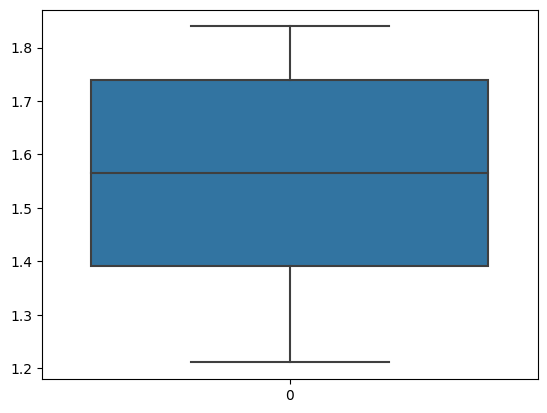

In [ ]:
sns.boxplot(reg_predict)

<Axes: >

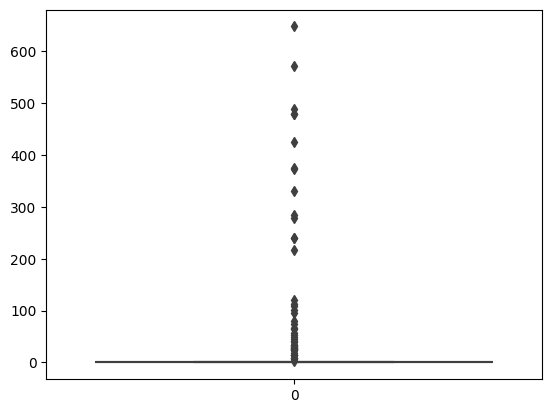

In [ ]:
sns.boxplot(y_test)

É possível notar que a maior parte dos dados originais são valores em 0 ou
próximos a ele, o que explicaria o estado mais "conservador" do modelo
nas predições feitas.

Podemos gerar um histograma para o erro:

<ipython-input-73-5a9b4fbbc0f3>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reg_predict-y_test)


<Axes: xlabel='transactionRevenue', ylabel='Density'>

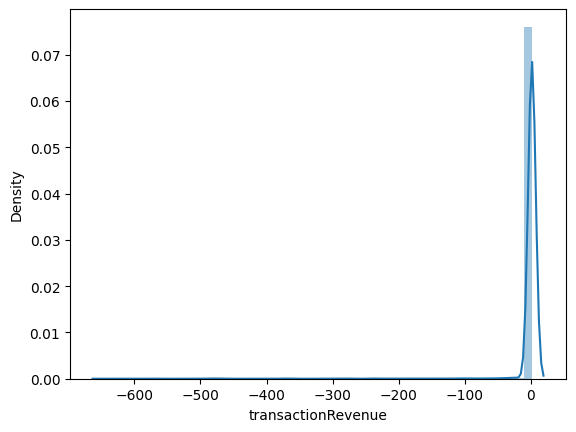

In [ ]:
sns.distplot(reg_predict-y_test)

Ou seja, podemos notar que a base está DESBALANCEADA.

## Parte 4: Melhorando o feature engineering

Vamos realizar uma análise sobre as últimas visitas do usuário a partir do agrupamento pela maior quantidade.

In [48]:
visitas_ultima = df.groupby('fullVisitorId', as_index=False)

In [49]:
# As visitas com maior visitNumber serão consideradas as últimas
visitas_ultima = visitas_ultima['visitNumber'].max()

In [51]:
visitas_ultima.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


Precisamos unir os dataframes para termos uma base mais completa,
para isso vamos garantir que os IDs são únicos.

In [52]:
usuarios_visitas_unicos = df.drop_duplicates(subset=['fullVisitorId', 
                                                     'visitNumber'])

In [53]:
# Quantidade de linhas não duplicadas.
len(usuarios_visitas_unicos)

12270

In [54]:
# Criando o DF das últimas visitas sem duplicatas de usuários e visitas
visitas = pd.merge(visitas_ultima, usuarios_visitas_unicos,
                   left_on=['fullVisitorId', 'visitNumber'],
                   right_on=['fullVisitorId', 'visitNumber'],
                   how='left')

In [55]:
visitas.head(5)

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0


In [40]:
# Quantidade de linhas do dataframe final
len(visitas)

9997

Analogamente, podemos criar um dataframe relacionado a primeira visita do usuário, obtendo as visitas com o menor valor de agrupamento.

In [56]:
visitas_primeira = df.groupby('fullVisitorId', as_index=False)

# As visitas com menor visitNumber serão consideradas as primeiras
visitas_primeira = visitas_primeira['visitNumber'].min()

In [57]:
# Setar o index do visitas_primeira para o ID do visitante
visitas_primeira.set_index('fullVisitorId', inplace=True)

In [58]:
# Unindo os DFs das visitas com as primeiras visitas
visitas = visitas.join(visitas_primeira, how='left', on='fullVisitorId',
                       rsuffix='_primeira')

In [45]:
visitas.head(5)

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue,visitNumber_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6


In [59]:
# Unindo dataframes
visitas = pd.merge(visitas, usuarios_visitas_unicos,
                   left_on=['fullVisitorId', 'visitNumber_primeira'],
                   right_on=['fullVisitorId', 'visitNumber'],
                   how='left', 
                   suffixes=['_ultima', '_primeira'])

In [60]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,...,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,hits_primeira,pageviews_primeira,bounces_primeira,newVisits_primeira,transactionRevenue_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0


Agora podemos limpar o dataframe para remover os dados que não irão ajudar o 
modelo a aprender.

In [61]:
quant

['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [62]:
for coluna in quant:
  visitas.drop(coluna+'_ultima', axis=1, inplace=True)
  visitas.drop(coluna+'_primeira', axis=1, inplace=True)

Como os IDs são apenas identificadores únicos, eles não serão relavantes para o
modelo. 

Logo, podemos *dropar* essas colunas.

In [64]:
ids = ['sessionId_ultima', 'visitId_ultima', 
       'sessionId_primeira', 'visitId_primeira']

In [65]:
visitas.drop(ids, axis=1, inplace=True)

Podemos também remover as colunas da primeira visita que lidam com questões geográficas do usuário.

In [66]:
geo = ['city_primeira', 'continent_primeira', 'country_primeira',
       'metro_primeira', 'region_primeira', 'networkDomain_primeira',
       'subContinent_primeira']

In [67]:
visitas.drop(geo, axis=1, inplace=True)

In [68]:
visitas.shape

(9997, 41)

Podemos adicionar a base de visitas as informações quantitativas que separamos
previamente.

In [71]:
visitas = pd.merge(visitas, df_quant,
                   left_on=['fullVisitorId'],
                   right_on=['fullVisitorId'],
                   how='left')

In [72]:
visitas.head(5)

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0


A informação do tempo entre a primeira visita e a última pode ser útil
para o aprendizado do modelo.

In [73]:
visitas['tempo_dif'] = visitas.visitStartTime_ultima - visitas.visitStartTime_primeira

Outra opção de dado que pode ser relevante é o total de visitas de cada usuário.

In [75]:
visitas['visits'] = df.groupby('fullVisitorId', as_index=False).count().visitNumber.values

Usar a data como uma *feature* pode ser uma opção interessante para o modelo.
Entretanto, para usar essa informação, precisamos dividir a coluna de data em 
ano, mês e dia.

In [81]:
visitas['ano_ultima'] = pd.to_numeric([data[0:4] for data in visitas.date_ultima])
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas.date_ultima])
visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in visitas.date_ultima])

visitas['ano_primeira'] = pd.to_numeric([data[0:4] for data in visitas.date_primeira])
visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in visitas.date_primeira])
visitas['dia_primeira'] = pd.to_numeric([data[6:8] for data in visitas.date_primeira])

In [82]:
visitas.head(5)

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,pageviews,transactionRevenue,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,1,0.0,0,1,2016,9,4,2016,9,4
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,3,0.0,0,1,2016,9,28,2016,9,28
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,2,0.0,0,1,2016,12,5,2016,12,5
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,1,0.0,0,1,2016,10,2,2016,10,2
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,2,0.0,0,1,2017,4,20,2017,4,20


## Parte 5: Treinando novos modelos

In [84]:
# Remover o fullVisitID da base depois das transformações
visitas.drop('fullVisitorId', axis=1, inplace=True)

In [87]:
y = visitas.transactionRevenue.copy()
x = visitas.drop('transactionRevenue', axis=1)

In [104]:
# Obtendo todas as variáveis qualitativas do dataframe
quali = visitas.dtypes[visitas.dtypes == object].keys()

Sabendo quais são as variáveis qualitativas, podemos convertê-las em um tipo
codificado para que auxiliem no aprendizado do modelo

In [94]:
lbl = LabelEncoder()

In [97]:
# Garatindo que todos valores da coluna são strings
strings = list(x.operatingSystem_ultima.values.astype('str'))

In [98]:
lbl.fit(strings)

LabelEncoder()

In [99]:
lbl.transform(strings)

array([ 9,  3,  9, ..., 11,  1,  9])

In [105]:
# Loop para todas as colunas qualitativas

for coluna in quali:
  lbl = LabelEncoder()
  strings = list(x[coluna].values.astype('str'))
  lbl.fit(strings)
  x[coluna] = lbl.transform(strings)

In [106]:
x.head(5)

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,...,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,7,34,1472974804,7,9,False,0,4,7,...,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,58,1475084026,5,3,False,0,2,11,...,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,126,1480996024,5,9,False,0,3,15,...,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,62,1475423502,15,9,False,0,4,7,...,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,262,1492707286,18,6,False,0,2,11,...,0.0,2,0,1,2017,4,20,2017,4,20


Agora podemos criar novos modelos de ML

In [107]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, 
                                                    random_state=42)

In [111]:
reg = LinearRegression()
reg.fit(x_train, y_train)
reg_predict = reg.predict(x_test)
reg_predict[reg_predict < 0] = 0

In [112]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [115]:
resultados[resultados.revenue > 0].head()

,revenue,predict,erro
3006,32.49,14.433404,-18.056596
5928,74.85,36.159109,-38.690891
8361,424.50,18.357382,-406.142618
8612,55.99,16.275254,-39.714746
416,15.19,22.567065,7.377065


In [117]:
# RMSE
np.sqrt(mean_squared_error(y_test, reg_predict))

25.059080483201733

<Axes: >

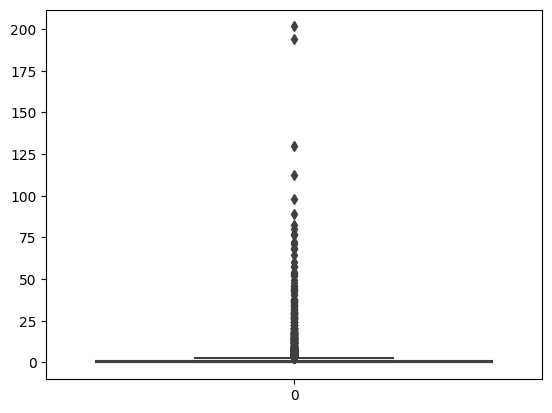

In [118]:
sns.boxplot(reg_predict)

### Gradient Boosting

In [120]:
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(x_train, y_train)
gbr_predict = gbr.predict(x_test)

In [121]:
# Substituindo valores negativos por 0
gbr_predict[gbr_predict < 0 ] = 0

In [122]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = gbr_predict
resultados['erro'] = gbr_predict - y_test

In [125]:
resultados[resultados.revenue > 0].head()

,revenue,predict,erro
3006,32.49,45.423628,12.933628
5928,74.85,0.000000,-74.850000
8361,424.50,35.721105,-388.778895
8612,55.99,21.136136,-34.853864
416,15.19,17.679543,2.489543


In [126]:
# RMSE
np.sqrt(mean_squared_error(y_test, gbr_predict))

23.10004349029805